In [3]:
from random import randint
from random import shuffle
import matplotlib.pyplot as plt

In [111]:
def outerTrees(points):
        # Computes the cross product of vectors p1p2 and p2p3
        # value of 0 means points are colinear; < 0, cw; > 0, ccw
        def cross(p1, p2, p3):
            return (p2[0] - p1[0])*(p3[1] - p1[1]) - (p2[1] - p1[1])*(p3[0] - p1[0])

        # Computes slope of line between p1 and p2
        def slope(p1, p2):
            return 1.0*(p1[1]-p2[1])/(p1[0]-p2[0]) if p1[0] != p2[0] else float('inf')

        # Find the smallest left point and remove it from points
        start = min(points, key=lambda p: (p[0], p[1]))
        points.pop(points.index(start))

        # Sort points so that traversal is from start in a ccw circle.
        points.sort(key=lambda p: (slope(p, start), -p[1], p[0]))

        # Add each point to the convex hull.
        # If the last 3 points make a cw turn, the second to last point is wrong. 
        ans = [start]
        for p in points:
            ans.append(p)
            while len(ans) > 2 and cross(ans[-3], ans[-2], ans[-1]) < 0:
                ans.pop(-2)
        return ans

In [66]:
points = []
for i in range(200):
    points.append((randint(0, 2000), (randint(0, 800))))

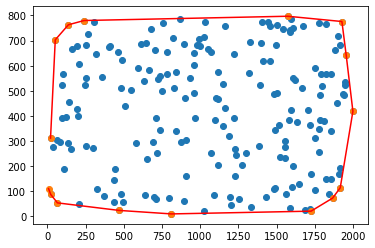

In [70]:
convex_hull = outerTrees(points)
hull_x = [p[0] for p in convex_hull]
hull_y = [p[1] for p in convex_hull]
x = [p[0] for p in points]
y = [p[1] for p in points]
plt.scatter(x, y)
plt.scatter(hull_x, hull_y)
plt.plot(hull_x, hull_y, '-r')
plt.show()

In [1]:
##from scipy.spatial import ConvexHull, convex_hull_plot_2d
import time
from numpy import random
import matplotlib.pyplot as plt
from random import randint
from random import shuffle
import math


In [124]:
def graham(size, distribution_of_X, distribution_of_Y):
    points = []
    for i in range(size):
        points.append((round(distribution_of_X*(random.normal(size=1)[0])), round(distribution_of_Y*random.normal(size=1)[0])))
    i = 1
    convex_hull = outerTrees(points)
    i = 1
    #convex_hull_plot_2d(convex_hull)

In [128]:
start_tim = time.time()
graham(1000000, 1000000, 1000000)
print(time.time() - start_tim)

18.836233854293823


In [71]:
slope((1,2), (1,2))

0

In [2]:
def slope(p1, p2):
            return 1.0*(p1[1]-p2[1])/(p1[0]-p2[0]) if p1[0] != p2[0] else float('inf')

In [3]:
def angle(a, b, c):
    return ((b[0] - a[0]) * (c[1] - a[1])) - ((c[0] - a[0]) * (b[1] - a[1]))

In [4]:
def slope(start, point):
    if start == point:
        return 0
    elif start[0] == point[0]:
        return 90
    else:
        result = math.degrees(math.atan((point[1]-start[1])/(point[0]-start[0])))
        if result < 0:
            return 180 + result
        else:
            return result

In [6]:
def convex_graham(points):
    start = min(points, key=lambda p: (p[1], p[0]))
    stack = []
    points.sort(key = lambda p: (slope(start, p), -p[1], p[0]))
    stack.append(points[-1])
    stack.append(points[0])
    stack.append(points[1])
    for i in range(2, len(points)):
        if angle(stack[len(stack)-2], stack[len(stack)-1], points[i]) > 0:
            stack.append(points[i])
        elif angle(stack[len(stack)-2], stack[len(stack)-1], points[i]) < 0:
            while angle(stack[len(stack)-2], stack[len(stack)-1], points[i]) < 0:
                stack.pop()
            stack.append(points[i])
        else:
            if points[i] != stack[len(stack)-1]:
                stack.append(points[i])
    #print(stack)
    return stack

In [145]:
points = []
for i in range(20):
    points.append((randint(0, 10), (randint(0, 10))))

In [158]:
points

[(0, 0),
 (1, 0),
 (7, 1),
 (9, 5),
 (9, 6),
 (6, 4),
 (7, 5),
 (8, 6),
 (8, 8),
 (7, 7),
 (3, 3),
 (1, 1),
 (1, 1),
 (7, 8),
 (8, 10),
 (7, 9),
 (3, 5),
 (2, 5),
 (1, 5),
 (0, 2)]

In [168]:
convex_hull convex_graham(points)

(0, 0)


[(0, 2), (0, 0), (1, 0), (7, 1), (9, 5), (9, 6), (8, 10), (1, 5), (0, 2)]

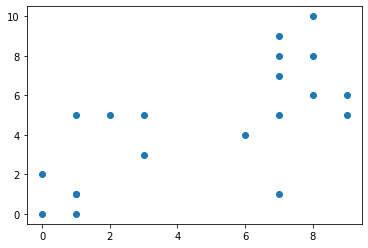

In [166]:
plt.scatter([p[0] for p in points], [p[1] for p in points])

In [126]:
convex_hull = outerTrees(points)
hull_x = [p[0] for p in convex_hull]
hull_y = [p[1] for p in convex_hull]
x = [p[0] for p in points]
y = [p[1] for p in points]
plt.scatter(x, y)
plt.scatter(hull_x, hull_y)
plt.plot(hull_x, hull_y, '-r')
plt.show()

-0.5555555555555556

In [28]:
def convex_show_graham_random(number_of_points, distribution_of_X, distribution_of_Y):
    points = []
    for i in range(number_of_points):
        points.append((randint(0, distribution_of_X), (randint(0, distribution_of_Y))))
    start_time = time.time()
    convex_hull = convex_graham(points)
    print("--- %s seconds ---" % (time.time() - start_time))
    hull_x = [p[0] for p in convex_hull]
    hull_y = [p[1] for p in convex_hull]
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    plt.scatter(x, y)
    plt.scatter(hull_x, hull_y)
    hull_x.append(convex_hull[0][0])
    hull_y.append(convex_hull[0][1])
    plt.plot(hull_x, hull_y, '-r')
    plt.show()

--- 0.1581587791442871 seconds ---


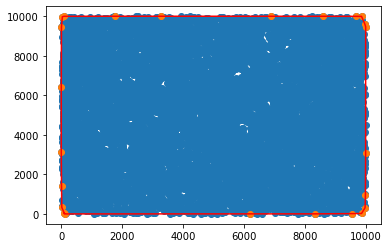

In [29]:
convex_show_graham_random(10000, 10000, 10000)

## RANDOM (1000, 1000, 1000) = --- 0.0049970149993896484 seconds ---
## RANDOM (10000, 10000, 10000) = --- 0.053969383239746094 seconds ---
## RANDOM (100000, 100000, 100000) = --- 0.4827406406402588 seconds ---
## RANDOM (1000000, 1000000, 1000000) = --- 5.56281304359436 seconds ---
## RANDOM (10000000, 10000000, 10000000) = --- 65.4176287651062 seconds ---

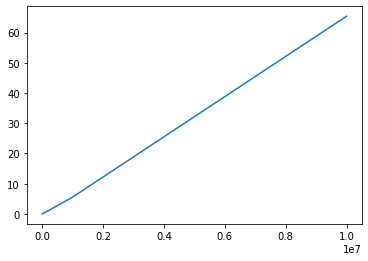

In [15]:
plt.plot([1000, 10000, 100000, 1000000, 10000000], [0.0049970149993896484, 0.053969383239746094, 0.4827406406402588, 5.56281304359436, 65.4176287651062])

In [259]:
def convex_show_graham_normal(number_of_points, distribution_of_X, distribution_of_Y):
    points = []
    for i in range(number_of_points):
        points.append((round(distribution_of_X*(random.normal(size=1)[0])), round(distribution_of_Y*random.normal(size=1)[0])))
    start_time = time.time()
    convex_hull = convex_graham(points)
    print("--- %s seconds ---" % (time.time() - start_time))


In [262]:
convex_show_graham_normal(100000, 100000, 100000)

--- 0.7905476093292236 seconds ---


[(-7325302.0, -49547921.0), (-1799970.0, -50395678.0), (12314089.0, -48773437.0), (13296636.0, -48630028.0), (23611242.0, -45577877.0), (35012554.0, -40529427.0), (53114284.0, -7429141.0), (53203498.0, 4311604.0), (49082479.0, 15974697.0), (39608548.0, 33112842.0), (26750433.0, 45665500.0), (21490736.0, 50679661.0), (11165611.0, 54557485.0), (-3807390.0, 54181489.0), (-15067004.0, 51653747.0), (-38653684.0, 39377625.0), (-40326632.0, 36901162.0), (-48607538.0, 22282664.0), (-50526396.0, 9438871.0), (-49780798.0, -9825257.0), (-47403044.0, -20061053.0), (-41714844.0, -27699576.0), (-37797729.0, -32327623.0), (-24725796.0, -44719788.0), (-22939922.0, -46269729.0), (-10598717.0, -48911389.0), (-7325302.0, -49547921.0)]
--- 92.93785166740417 seconds ---


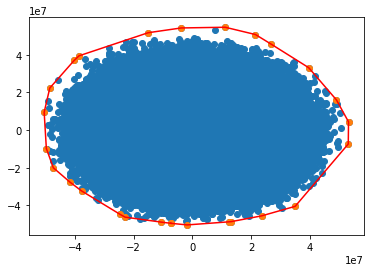

In [256]:
convex_show_graham_normal(10000, 10000, 10000)

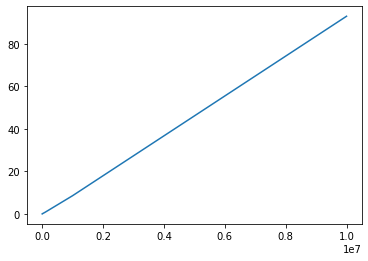

In [14]:
plt.plot([1000, 10000, 100000, 1000000, 10000000], [0.0099945068359375, 0.1082158088684082, 0.8115363121032715, 8.575108528137207, 92.93785166740417])

## NORMAL (1000, 1000, 1000) = --- 0.0099945068359375 seconds ---
## NORMAL (10000, 10000, 10000) = --- 0.1082158088684082 seconds ---
## NORMAL (100000, 100000, 100000) = --- 0.8115363121032715 seconds ---
## NORMAL (1000000, 1000000, 1000000) = -- 8.575108528137207 seconds ---
## NORMAL (10000000, 10000000, 10000000) = --- 92.93785166740417 seconds ---

In [9]:
import math
pi = math.pi

def PointsInCircum(r,n=10):
    return [(math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r) for x in range(0,n+1)]

In [8]:
def convex_show_graham_circle(number_of_points, distribution):
    points = []
    points = PointsInCircum(distribution, number_of_points)
        #points.append((round(distribution_of_X*(random.normal(size=1)[0])), round(distribution_of_Y*random.normal(size=1)[0])))
    start_time = time.time()
    convex_hull = convex_graham(points)
    print("--- %s seconds ---" % (time.time() - start_time))

--- 2.0548245906829834 seconds ---


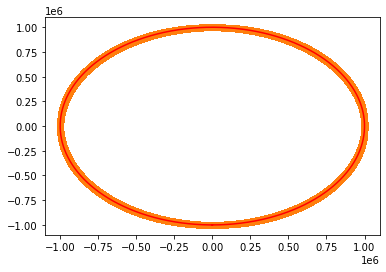

In [272]:
convex_show_graham_circle(1000000, 1000000)

In [11]:
convex_show_graham_circle(10000000, 10000000)

--- 19.98458242416382 seconds ---


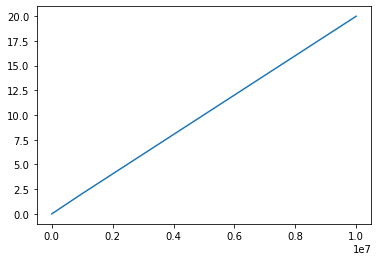

In [13]:
plt.plot([1000, 10000, 100000, 1000000, 10000000], [0.0020122528076171875, 0.028988361358642578, 0.20989489555358887, 2.0548245906829834, 19.98458242416382])

## CIRCLE (1000, 1000, 1000) = --- 0.0020122528076171875 seconds ---
## CIRCLE (10000, 10000, 10000) = --- 0.028988361358642578 seconds ---
## CIRCLE (100000, 100000, 100000) = --- 0.20989489555358887 seconds ---
## CIRCLE (1000000, 1000000, 1000000) = --- 2.0548245906829834 seconds ---
## CIRCLE (10000000, 10000000, 10000000) = --- 19.98458242416382 seconds ---

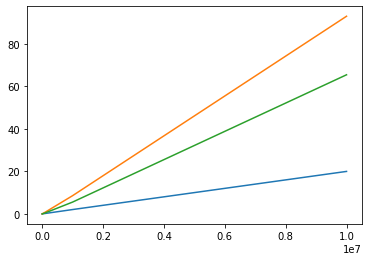

In [27]:
plt.plot([1000, 10000, 100000, 1000000, 10000000], [0.0020122528076171875, 0.028988361358642578, 0.20989489555358887, 2.0548245906829834, 19.98458242416382], label='ffgfg')
plt.plot([1000, 10000, 100000, 1000000, 10000000], [0.0099945068359375, 0.1082158088684082, 0.8115363121032715, 8.575108528137207, 92.93785166740417])
plt.plot([1000, 10000, 100000, 1000000, 10000000], [0.0049970149993896484, 0.053969383239746094, 0.4827406406402588, 5.56281304359436, 65.4176287651062])
plt.show()